In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt


from src.models import SIRM, SIRT, SIRV, SIRM_isolated, SIRV_isolated, SIRT_isolated
from src.utils.batch_sweep import sweep_one_parameter, sweep_two_parameters
from src.utils.visualization.heatmaps import plot_compartment_heatmap2
from src.utils.visualization.core import create_standalone_colorbar, Lx, Ly, discretize_cmaps

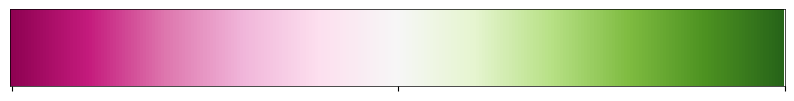

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Your custom colorscheme
colors = ['#8e0152', '#c51b7d', '#de77ae', '#f1b6da', '#fde0ef', 
          '#f7f7f7', '#e6f5d0', '#b8e186', '#7fbc41', '#4d9221', '#276419']

# Create a custom colormap using your colors
cmap_name = 'custom_diverging'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 1))

# Create data for the colorbar
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Display the colorbar
ax.imshow(gradient, aspect='auto', cmap=custom_cmap)

# Remove ticks from the plot
ax.set_yticks([])
ax.set_xticks(np.linspace(0, 256, 3))
ax.set_xticklabels([])


# Optional: Add a border to the colorbar
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(0.5)



fig.savefig('custom_colorbar.pdf', dpi=300, bbox_inches='tight')

# Plot 3 beta distributions

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import beta
from matplotlib.collections import LineCollection

In [106]:
def plot_beta_with_gradient(alpha, beta_param, Nbins=100):
    fig, ax = plt.subplots(figsize=(Lx/2*5, Ly/3*5))
    
    x = np.linspace(1/Nbins/2, 1-1/Nbins/2, Nbins)
    y = beta.pdf(x, alpha, beta_param)
    ax.plot(x, y, '--', color='black', linewidth=5)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    lc = LineCollection(segments, cmap=custom_cmap, norm=plt.Normalize(0, 1))
    lc.set_array(x[:-1])
    lc.set_linewidth(20)
    
    line = ax.add_collection(lc)
       
    ax.set_xlim(-0.01, 1.01)
    ax.set_ylim(-0.05, 5.05)
    # remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)

    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    fig.patch.set_visible(False)
    plt.show()



    return fig, ax

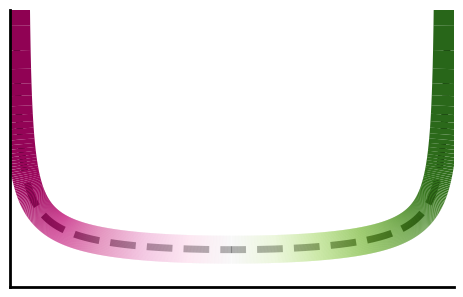

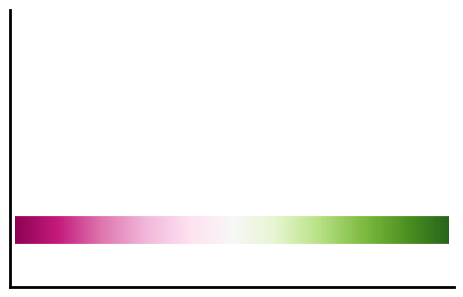

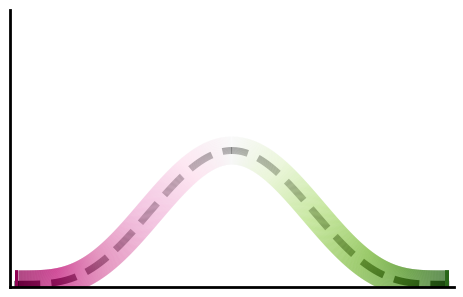

In [107]:
fig, ax = plot_beta_with_gradient(0.5, 0.5, Nbins=1000)  # Symmetric
# save figure
fig.savefig('figures/beta_distribution05.pdf', dpi=300, bbox_inches='tight')
fig, ax = plot_beta_with_gradient(1, 1, Nbins=1000)  # Symmetric
fig.savefig('figures/beta_distribution1.pdf', dpi=300, bbox_inches='tight')
fig, ax = plot_beta_with_gradient(5, 5, Nbins=1000)  # Symmetric
fig.savefig('figures/beta_distribution5.pdf', dpi=300, bbox_inches='tight')

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from typing import List, Optional, Tuple

def plot_contact_matrices(h_values: List[float], 
                         n_groups: int = 5,
                         figsize: Tuple[int, int] = (15, 3),
                         cmap: str = "Blues",
                         save_path: Optional[str] = None):
    """
    Plot contact matrices for different values of homophilic tendency (h).
    
    Args:
        h_values: List of homophilic tendency values to visualize
        n_groups: Number of population groups (matrix size will be n_groups x n_groups)
        figsize: Figure size (width, height)
        cmap: Colormap to use
        save_path: Path to save the figure (if None, figure is not saved)
        
    Returns:
        Matplotlib figure object
    """
    # Import the matrix creation function
    from src.utils.Contact_Matrix import create_contact_matrix
    
    # Create a figure with subplots for each h value
    n_plots = len(h_values)
    fig, axes = plt.subplots(1, n_plots, figsize=figsize)
    
    # If only one h value, make axes iterable
    if n_plots == 1:
        axes = [axes]
    
    # Create an equal population distribution
    pop = jnp.ones(n_groups)
    
    # For each h value, create and plot the contact matrix
    for i, h in enumerate(axes):
        # Create contact matrix
        h_val = h_values[i]
        C = create_contact_matrix(n_groups, h_val, pop)
        
        # Plot as heatmap
        im = axes[i].imshow(C, cmap=cmap, vmin = 0, vmax = 2)

        axes[i].set_xticklabels([])
        axes[i].set_yticklabels([])        
        axes[i].grid(False)
        
        # Show the matrix values
        #for di in range(n_groups):
            #for dj in range(n_groups):
                #axes[i].text(dj, di, f'{C[di, dj]:.2f}', 
                #           ha='center', va='center', 
                #           color='white' if C[di, dj] > 0.5 else 'black')
    

    fig.patch.set_visible(False)
    # Save if requested
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    return fig

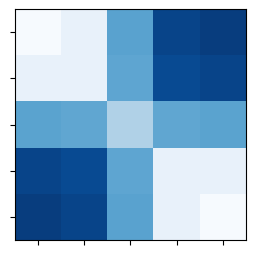

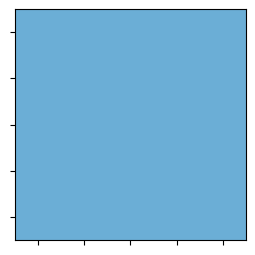

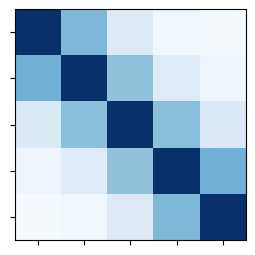

In [111]:
h = 5

h_values = [-h]  # Different homophilic tendency values
fig = plot_contact_matrices(h_values, n_groups=5, save_path='figures/contact_matrices-.pdf')
plt.show()

h_values = [0]  # Different homophilic tendency values
fig = plot_contact_matrices(h_values, n_groups=5, save_path='figures/contact_matrices0.pdf')
plt.show()

h_values = [h]  # Different homophilic tendency values
fig = plot_contact_matrices(h_values, n_groups=5, save_path='figures/contact_matrices+.pdf')
plt.show()


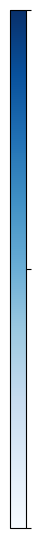

In [115]:
cbar_fig = create_standalone_colorbar(
    cmap_name='Blues',
    vmin=0,
    vmax=2,
    height=Ly*3,
    width=Ly/8*3,
    ticks=[0, 1, 2],
    ticklabels=[],
    save_path='figures/Fig_0/colorbar_contact_matrices.pdf'
)

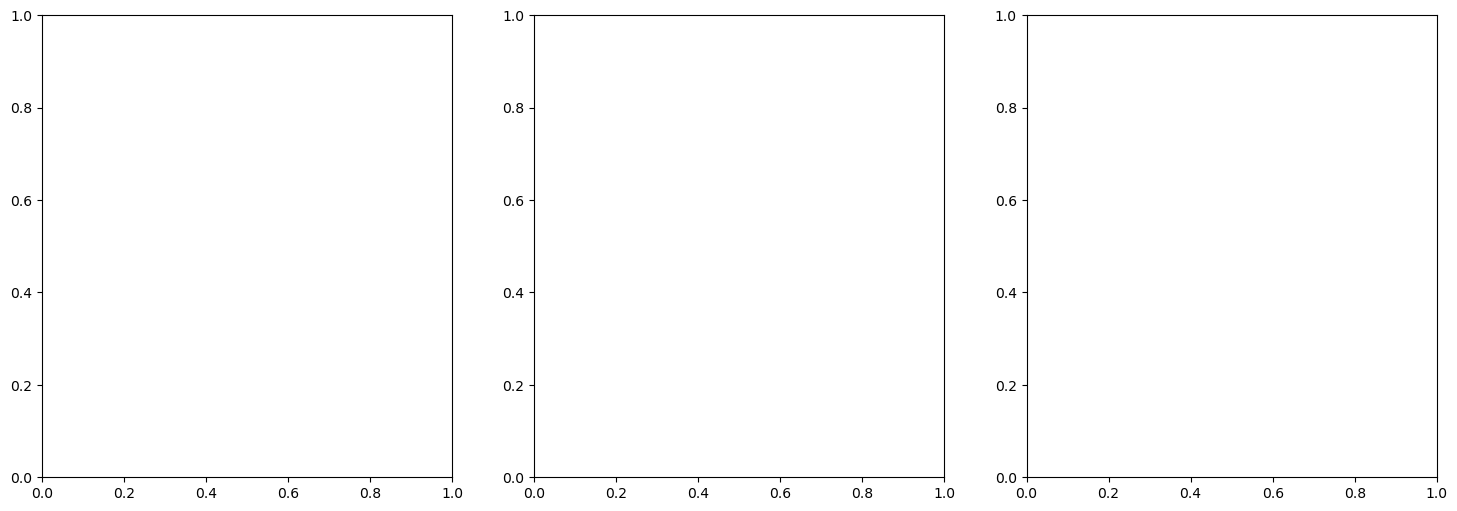

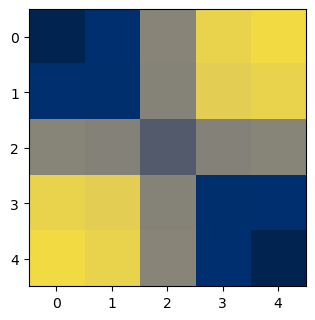

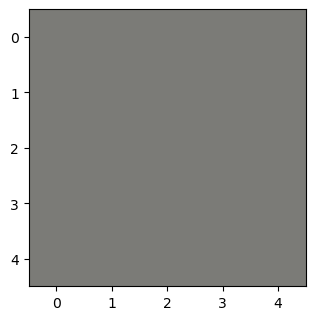

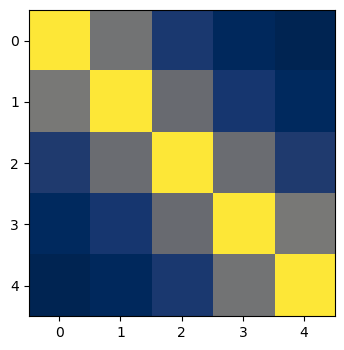

In [81]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from src.utils.Contact_Matrix import create_contact_matrix

# Set population size
n_groups = 5

# Create population distribution (uniform for simplicity)
populations = jnp.ones(n_groups)

# Create contact matrices with different homophily parameters
h_negative = -5   # Strong heterophily (preferential mixing with different groups)
h_zero = 0        # Random mixing (no preference)
h_positive = 5    # Strong homophily (preferential mixing with similar groups)

# Generate the three contact matrices
C_negative = create_contact_matrix(n_groups, h_negative, populations)
C_zero = create_contact_matrix(n_groups, h_zero, populations)
C_positive = create_contact_matrix(n_groups, h_positive, populations)

# Visualize the contact matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot each matrix
matrices = [C_negative, C_zero, C_positive]
titles = ["Heterophily (h = -5)", "Random Mixing (h = 0)", "Homophily (h = 5)"]

for i, (matrix, title) in enumerate(zip(matrices, titles)):
    fig, ax = plt.subplots(figsize=(Lx/2*5, Ly/3*5))
    ax.imshow(matrix, cmap='cividis', vmin=0, vmax=2)
    
plt.tight_layout()
plt.show()

In [7]:
NP = 100
pol_range = {"m": 0, "M": 1, "n": NP}
custom_base_params = {
        'beta_M': 0.25,
        'recovery_rate': 0.1,
        'dT': 1,
        'SPB_exponent': 1,
        # parameters for SIRM
        'mu_min': 0,
        'mu_max': 1,
        # parameters for SIRT
        'testing_rate_min': 0,        # Set minimum testing rate to 0
        'testing_rate_max': 2/6,      # Set maximum testing rate to 2/7
        # parameters for SIRV
        'vaccination_rate_min': 0,        # Set minimum VR to 0
        'vaccination_rate_max': 0.015,    # Set maximum VR to 0.015

    }

params_m50 = custom_base_params.copy()
params_m50['homophilic_tendency'] = -5
params_m50['name'] = 'm50'

params_m25 = custom_base_params.copy()
params_m25['homophilic_tendency'] = -2.5
params_m25['name'] = 'm25'

params_0 = custom_base_params.copy()
params_0['homophilic_tendency'] = 0
params_0['name'] = '0'

params_p25 = custom_base_params.copy()
params_p25['homophilic_tendency'] = 2.5
params_p25['name'] = 'p25'

params_p50 = custom_base_params.copy()
params_p50['homophilic_tendency'] = 5
params_p50['name'] = 'p50'

In [11]:
# Define publication parameters
final_params = {
    'Lx': Lx/2,  # Standard figure width
    'Ly': Ly/2,  # Standard figure height
    'xticks': [0, 1.0],  # Custom x-tick positions
    'yticks': [0,  50,  99],  # Custom y-tick positions
    'xlim': [0, 1],  # x-axis limits
    'ylim': [0, 99],  # y-axis limits
    'vmin': 0,  # Minimum color value
    'vmax': 1  # Maximum color value (adjust based on expected infection levels)
}

contour_values = [0.2, 0.4, 0.6, 0.8]
contour_colors = ['#000','#000','#000','#000']
# Create publication-ready heatmap


# SIRM

figures/Fig_0/I_PC_Mm50.pdf
figures/Fig_0/I_PC_Mm25.pdf
figures/Fig_0/I_PC_M0.pdf
figures/Fig_0/I_PC_Mp25.pdf
figures/Fig_0/I_PC_Mp50.pdf


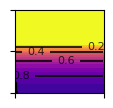

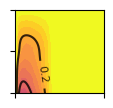

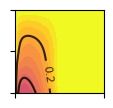

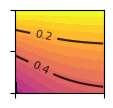

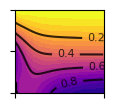

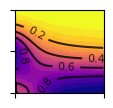

In [12]:
param_list = [params_m50, params_m25, params_0, params_p25, params_p50]

res_temp = sweep_one_parameter(
    model_module=SIRM_isolated,
    param_name="beta_params",  # This is how polarization is referenced in the code
    param_range=pol_range,
    simulated_days=1000,  # Simulate for 1000 days to reach steady state
    custom_base_params=custom_base_params,
    population_size=100  # 100 compartments as you requested
)
fig = plot_compartment_heatmap2(
    results=res_temp,
    compartment="R",
    cmap="plasma_r",
    discretize=True,  # Use discrete color levels
    n_colors=21,      # Number of discrete colors
    final_params=final_params,
    contour_values = contour_values,
    contour_colors = contour_colors,
    save_path="figures/Fig_0/I_PC_M_isolated.pdf"  # Optional: save the figure
)

for param in param_list:
    res_temp = sweep_one_parameter(
        model_module=SIRM,
        param_name="beta_params",  # This is how polarization is referenced in the code
        param_range=pol_range,
        simulated_days=1000,  # Simulate for 1000 days to reach steady state
        custom_base_params=param,
        population_size=100  # 100 compartments as you requested
    )
    file_name = 'figures/Fig_0/I_PC_M' + param['name'] + '.pdf'
    fig = plot_compartment_heatmap2(
        results=res_temp,
        compartment="R",
        cmap="plasma_r",
        discretize=True,  # Use discrete color levels
        n_colors=21,      # Number of discrete colors
        final_params=final_params,
        contour_values = contour_values,
        contour_colors = contour_colors,
        save_path=file_name
    )    
    print(file_name)

figures/Fig_0/I_PC_Tm50.pdf
figures/Fig_0/I_PC_Tm25.pdf
figures/Fig_0/I_PC_T0.pdf
figures/Fig_0/I_PC_Tp25.pdf
figures/Fig_0/I_PC_Tp50.pdf


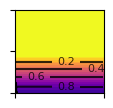

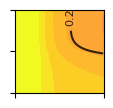

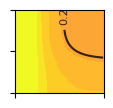

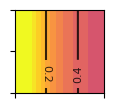

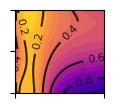

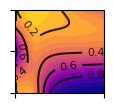

In [13]:
param_list = [params_m50, params_m25, params_0, params_p25, params_p50]

res_temp = sweep_one_parameter(
    model_module=SIRT_isolated,
    param_name="beta_params",  # This is how polarization is referenced in the code
    param_range=pol_range,
    simulated_days=1000,  # Simulate for 1000 days to reach steady state
    custom_base_params=custom_base_params,
    population_size=100  # 100 compartments as you requested
)
fig = plot_compartment_heatmap2(
    results=res_temp,
    compartment="R",
    cmap="plasma_r",
    discretize=True,  # Use discrete color levels
    n_colors=21,      # Number of discrete colors
    final_params=final_params,
    contour_values = contour_values,
    contour_colors = contour_colors,
    save_path="figures/Fig_0/I_PC_T_isolated.pdf"  # Optional: save the figure
)

for param in param_list:
    res_temp = sweep_one_parameter(
        model_module=SIRT,
        param_name="beta_params",  # This is how polarization is referenced in the code
        param_range=pol_range,
        simulated_days=1000,  # Simulate for 1000 days to reach steady state
        custom_base_params=param,
        population_size=100  # 100 compartments as you requested
    )
    file_name = 'figures/Fig_0/I_PC_T' + param['name'] + '.pdf'
    fig = plot_compartment_heatmap2(
        results=res_temp,
        compartment="R",
        cmap="plasma_r",
        discretize=True,  # Use discrete color levels
        n_colors=21,      # Number of discrete colors
        final_params=final_params,
        contour_values = contour_values,
        contour_colors = contour_colors,
        save_path=file_name
    )    
    print(file_name)

figures/Fig_0/I_PC_Vm50.pdf
figures/Fig_0/I_PC_Vm25.pdf
figures/Fig_0/I_PC_V0.pdf
figures/Fig_0/I_PC_Vp25.pdf
figures/Fig_0/I_PC_Vp50.pdf


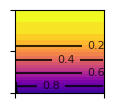

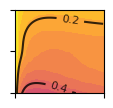

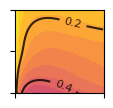

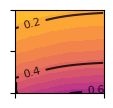

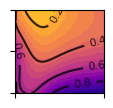

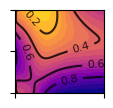

In [14]:
param_list = [params_m50, params_m25, params_0, params_p25, params_p50]

res_temp = sweep_one_parameter(
    model_module=SIRV_isolated,
    param_name="beta_params",  # This is how polarization is referenced in the code
    param_range=pol_range,
    simulated_days=1000,  # Simulate for 1000 days to reach steady state
    custom_base_params=custom_base_params,
    population_size=100  # 100 compartments as you requested
)
fig = plot_compartment_heatmap2(
    results=res_temp,
    compartment="R",
    cmap="plasma_r",
    discretize=True,  # Use discrete color levels
    n_colors=21,      # Number of discrete colors
    final_params=final_params,
    contour_values = contour_values,
    contour_colors = contour_colors,
    save_path="figures/Fig_0/I_PC_V_isolated.pdf"  # Optional: save the figure
)

for param in param_list:
    res_temp = sweep_one_parameter(
        model_module=SIRV,
        param_name="beta_params",  # This is how polarization is referenced in the code
        param_range=pol_range,
        simulated_days=1000,  # Simulate for 1000 days to reach steady state
        custom_base_params=param,
        population_size=100  # 100 compartments as you requested
    )
    file_name = 'figures/Fig_0/I_PC_V' + param['name'] + '.pdf'
    fig = plot_compartment_heatmap2(
        results=res_temp,
        compartment="R",
        cmap="plasma_r",
        discretize=True,  # Use discrete color levels
        n_colors=21,      # Number of discrete colors
        final_params=final_params,
        contour_values = contour_values,
        contour_colors = contour_colors,
        save_path=file_name
    )    
    print(file_name)

In [15]:
cbar_fig = create_standalone_colorbar(
    cmap_name=discretize_cmaps('plasma_r',21),
    vmin=0,
    vmax=1,
    height=Ly/2,
    width=Ly/8,
    ticks=[0, 0.5, 1],
    ticklabels=[],
    save_path='figures/Fig_0/plasma_r_colorbar.pdf'
)

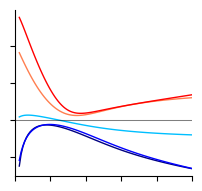

In [69]:
# With your existing data and model runs:

# Define publication styling parameters
pub_params = {
    'fig_size': (2.29, 2.16),  # Standard figure dimensions
    'xticks': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0],  # Custom x-axis ticks if needed
    'yticks': None,  # Will be determined by data or set manually
    'xticklabels': [],  # Empty for publication
    'yticklabels': [],  # Empty for publication
    'xlim': (0.0, 1.0),  # Full polarization range
    'ylim': None,  # Will be determined by data or set manually
}

# Define custom colors to match your other figures
colors = ["#000080", "#0000FF", "#00BFFF", "#FF7F50", "#FF0000"]  # Example colors - adjust to match your scheme

# Create the publication-ready plot
fig = plot_polarization_vs_percent_change_publication(
    isolated_results=isolated_results,
    homophily_results_list=homophily_results,
    compartment="R",  # Using R (recovered) as proxy for total infections
    param_labels=param_labels,
    colors=colors,
    x_label="",  # Empty for publication style
    y_label="",  # Empty for publication style
    fig_size=pub_params['fig_size'],
    xticks=pub_params['xticks'],
    yticks=pub_params['yticks'],
    xticklabels=pub_params['xticklabels'],
    yticklabels=pub_params['yticklabels'],
    xlim=pub_params['xlim'],
    ylim=pub_params['ylim'],
    save_path="figures/Fig_0/percent_change_many_H_M.pdf",
    show_legend=False,  # Typically no legend for publication figures
    linewidth=1.0  # Thinner lines for publication
)

In [84]:
# Define your polarization range if not already defined
pol_range = {"m": 0.0, "M": 1.0, "n": 100}  # Adjust n as needed for resolution

# Define custom base parameters for SIRM model
custom_base_params_sirm = {
    'beta_M': 0.2,
    'recovery_rate': 0.1,
    'dT': 1,
    'SPB_exponent': 1,
    # parameters for SIRM
    'mu_min': 0,
    'mu_max': 0.5,
    'testing_rate_min': 0,        
    'testing_rate_max': 1/6,
    'vaccination_rate_min': 0,
    'vaccination_rate_max': 0.0075
}

# Create a list of param dictionaries with different homophilic tendency values
params_sirt_list = [
    {**custom_base_params, 'homophilic_tendency': -2, 'name': '_h-2'},
    {**custom_base_params, 'homophilic_tendency': -1, 'name': '_h-1'},
    {**custom_base_params, 'homophilic_tendency': 0.0, 'name': '_h0.0'},
    {**custom_base_params, 'homophilic_tendency': 1, 'name': '_h1'},
    {**custom_base_params, 'homophilic_tendency': 2, 'name': '_h2'}
]

In [85]:
# Define publication styling parameters
pub_params = {
    'fig_size': (2.29, 2.16),
    'xticks': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
    'yticks': None,  # Will be determined automatically
    'xticklabels': [],
    'yticklabels': [],
    'xlim': (0.0, 1.0),
    'ylim': None,  # Will be determined automatically or set manually if needed
}


In [96]:
SIRM_I = sweep_one_parameter(
    model_module=SIRM_isolated,  # Use SIRM model with homophilic_tendency=0
    param_name="beta_params",
    param_range=pol_range,
    simulated_days=1000,
    custom_base_params=custom_base_params_sirm,  # Ensure isolated case
    population_size=100
)
SIRT_I = sweep_one_parameter(
    model_module=SIRT_isolated,  # Use SIRT model with homophilic_tendency=0 or a special isolated version
    param_name="beta_params",
    param_range=pol_range,
    simulated_days=1000,
    custom_base_params=custom_base_params_sirm,  # Ensure isolated case
    population_size=100
)
SIRV_I = sweep_one_parameter(
    model_module=SIRV_isolated,  # Use SIRV model with homophilic_tendency=0
    param_name="beta_params",
    param_range=pol_range,
    simulated_days=1000,
    custom_base_params=custom_base_params_sirm,  # Ensure isolated case
    population_size=100
)

SIRM_result = []
SIRM_labels = []

SIRT_result = []
SIRT_labels = []

SIRV_result = []
SIRV_labels = []

for param in params_sirm_list:
    results = sweep_one_parameter(
        model_module=SIRM,
        param_name="beta_params",
        param_range=pol_range,
        simulated_days=1000,
        custom_base_params=param,
        population_size=100
    )
    SIRM_result.append(results)
    SIRM_labels.append(param['name'])

    results = sweep_one_parameter(
        model_module=SIRT,
        param_name="beta_params",
        param_range=pol_range,
        simulated_days=1000,
        custom_base_params=param,
        population_size=100
    )

    SIRT_result.append(results)
    SIRT_labels.append(param['name'])

    results = sweep_one_parameter(
        model_module=SIRV,
        param_name="beta_params",
        param_range=pol_range,
        simulated_days=1000,
        custom_base_params=param,
        population_size=100
    )

    SIRV_result.append(results)
    SIRV_labels.append(param['name'])


In [95]:
colors_sirm = ["#08306b", "#08519c", "#2171b5", "#4292c6", "#6baed6"]

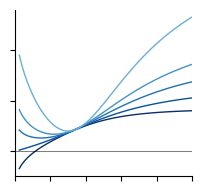

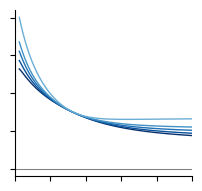

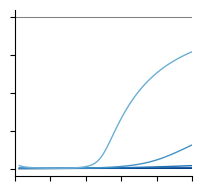

In [97]:
# Create the publication-ready plot for SIRM models
fig_sirm = plot_polarization_vs_percent_change_publication(
    isolated_results=SIRM_I,
    homophily_results_list=SIRM_result,
    compartment="R",  # Using recovered compartment to measure total infections
    param_labels=SIRM_labels,
    colors=colors_sirm,
    x_label="",
    y_label="",
    fig_size=pub_params['fig_size'],
    xticks=pub_params['xticks'],
    yticks=pub_params['yticks'],
    xticklabels=pub_params['xticklabels'],
    yticklabels=pub_params['yticklabels'],
    xlim=pub_params['xlim'],
    ylim=pub_params['ylim'],
    save_path="figures/Fig_0/percent_change_vs_polarization_SIRM.pdf",
    show_legend=False,
    linewidth=1.0
)

fig_sirt = plot_polarization_vs_percent_change_publication(
    isolated_results=SIRT_I,
    homophily_results_list=SIRT_result,
    compartment="R",  # Using recovered compartment to measure total infections
    param_labels=SIRT_labels,
    colors=colors_sirm,
    x_label="",
    y_label="",
    fig_size=pub_params['fig_size'],
    xticks=pub_params['xticks'],
    yticks=pub_params['yticks'],
    xticklabels=pub_params['xticklabels'],
    yticklabels=pub_params['yticklabels'],
    xlim=pub_params['xlim'],
    ylim=pub_params['ylim'],
    save_path="figures/Fig_0/percent_change_vs_polarization_SIRT.pdf",
    show_legend=False,
    linewidth=1.0
)

fig_sirv = plot_polarization_vs_percent_change_publication(
    isolated_results=SIRV_I,
    homophily_results_list=SIRV_result,
    compartment="R",  # Using recovered compartment to measure total infections
    param_labels=SIRV_labels,
    colors=colors_sirm,
    x_label="",
    y_label="",
    fig_size=pub_params['fig_size'],
    xticks=pub_params['xticks'],
    yticks=pub_params['yticks'],
    xticklabels=pub_params['xticklabels'],
    yticklabels=pub_params['yticklabels'],
    xlim=pub_params['xlim'],
    ylim=pub_params['ylim'],
    save_path="figures/Fig_0/percent_change_vs_polarization_SIRV.pdf",
    show_legend=False,
    linewidth=1.0
)

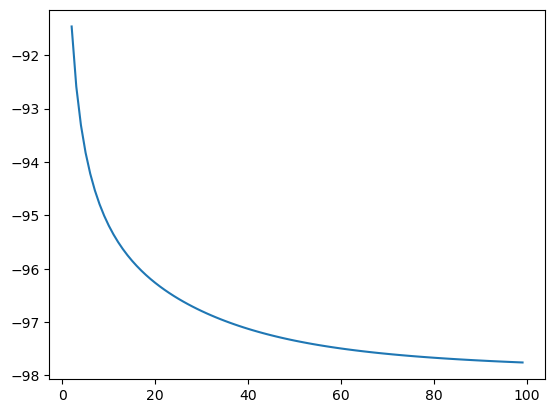

In [133]:
custom_base_params_sirm = {
    'beta_M': 0.2,
    'recovery_rate': 0.1,
    'dT': 1,
    'SPB_exponent': 1,
    # parameters for SIRM
    'mu_min': 0,
    'mu_max': 1
}

SIRM_I = sweep_one_parameter(
    model_module=SIRM_isolated,  # Use SIRM model with homophilic_tendency=0
    param_name="beta_params",
    param_range=pol_range,
    simulated_days=1000,
    custom_base_params=custom_base_params_sirm,  # Ensure isolated case
    population_size=100
)

res_0 = sweep_one_parameter(
        model_module=SIRM,
        param_name="beta_params",
        param_range=pol_range,
        simulated_days=1000,
        custom_base_params=custom_base_params_sirm,
        population_size=100
    )

import numpy as np

R_M = np.array(SIRM_I['final_state']['R'])
R_ISOLATED = np.sum(R_M, axis=1)


R_M = np.array(res_0['final_state']['R'])
R_0 = np.sum(R_M, axis=1)    


plt.plot((R_0-R_ISOLATED)/R_ISOLATED*100)

In [131]:
pol_range

{'m': 0.0, 'M': 1.0, 'n': 100}

In [ ]:
SIRM

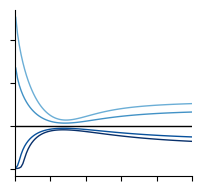

In [ ]:
# Run the isolated SIRT model (baseline)
isolated_results_sirt = sweep_one_parameter(
    model_module=SIRT,  # Use SIRT model with homophilic_tendency=0 or a special isolated version
    param_name="beta_params",
    param_range=pol_range,
    simulated_days=1000,
    custom_base_params={**custom_base_params, 'homophilic_tendency': 0},  # Ensure isolated case
    population_size=100
)

# Store results from SIRT models with different homophily settings
homophily_results_sirt = []
param_labels_sirt = []

for param in params_sirt_list:
    results = sweep_one_parameter(
        model_module=SIRT,
        param_name="beta_params",
        param_range=pol_range,
        simulated_days=1000,
        custom_base_params=param,
        population_size=100
    )
    homophily_results_sirt.append(results)
    param_labels_sirt.append(f"h={param['homophilic_tendency']}")  # Create readable labels

# Define colors for the SIRT model plots - using a blue-red gradient
colors_sirm = ["#08306b", "#08519c", "#000", "#4292c6", "#6baed6"]

# Create the publication-ready plot for SIRT models
fig_sirt = plot_polarization_vs_percent_change_publication(
    isolated_results=isolated_results_sirt,
    homophily_results_list=homophily_results_sirt,
    compartment="R",  # Using recovered compartment to measure total infections
    param_labels=param_labels_sirt,
    colors=colors_sirm,
    x_label="",
    y_label="",
    fig_size=pub_params['fig_size'],
    xticks=pub_params['xticks'],
    yticks=pub_params['yticks'],
    xticklabels=pub_params['xticklabels'],
    yticklabels=pub_params['yticklabels'],
    xlim=pub_params['xlim'],
    ylim=pub_params['ylim'],
    save_path="figures/Fig_0/percent_change_vs_polarization_SIRT.pdf",
    show_legend=False,
    linewidth=1.0
)


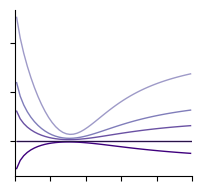

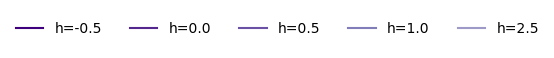

In [77]:
# Define your polarization range if not already defined
pol_range = {"m": 0.0, "M": 1.0, "n": 50}  # Adjust n as needed for resolution

# Define custom base parameters for SIRV model
custom_base_params_sirv = {
    'beta_M': 0.2,
    'recovery_rate': 0.1,
    'dT': 1,
    'SPB_exponent': 1,
    # parameters for SIRV
    'vaccination_rate_min': 0,
    'vaccination_rate_max': 0.0075
}

# Create a list of param dictionaries with different homophilic tendency values
params_sirv_list = [
    {**custom_base_params_sirv, 'homophilic_tendency': -0.5, 'name': '_h-0.5'},
    {**custom_base_params_sirv, 'homophilic_tendency': 0.0, 'name': '_h0.0'},
    {**custom_base_params_sirv, 'homophilic_tendency': 0.5, 'name': '_h0.5'},
    {**custom_base_params_sirv, 'homophilic_tendency': 1.0, 'name': '_h1.0'},
    {**custom_base_params_sirv, 'homophilic_tendency': 2.5, 'name': '_h2.5'}
]

# Run the isolated SIRV model (baseline)
isolated_results_sirv = sweep_one_parameter(
    model_module=SIRV,  # Use SIRV model with homophilic_tendency=0
    param_name="beta_params",
    param_range=pol_range,
    simulated_days=1000,
    custom_base_params={**custom_base_params_sirv, 'homophilic_tendency': 0},  # Ensure isolated case
    population_size=100
)

# Store results from SIRV models with different homophily settings
homophily_results_sirv = []
param_labels_sirv = []

for param in params_sirv_list:
    results = sweep_one_parameter(
        model_module=SIRV,
        param_name="beta_params",
        param_range=pol_range,
        simulated_days=1000,
        custom_base_params=param,
        population_size=100
    )
    homophily_results_sirv.append(results)
    param_labels_sirv.append(f"h={param['homophilic_tendency']}")  # Create readable labels

# Define publication styling parameters
pub_params = {
    'fig_size': (2.29, 2.16),
    'xticks': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
    'yticks': None,  # Will be determined automatically
    'xticklabels': [],
    'yticklabels': [],
    'xlim': (0.0, 1.0),
    'ylim': None,  # Will be determined automatically or set manually if needed
}

# Define colors for the SIRV model plots - using a purple gradient
colors_sirv = ["#3f007d", "#54278f", "#6a51a3", "#807dba", "#9e9ac8"]

# Create the publication-ready plot for SIRV models
fig_sirv = plot_polarization_vs_percent_change_publication(
    isolated_results=isolated_results_sirv,
    homophily_results_list=homophily_results_sirv,
    compartment="R",  # Using recovered compartment to measure total infections
    param_labels=param_labels_sirv,
    colors=colors_sirv,
    x_label="",
    y_label="",
    fig_size=pub_params['fig_size'],
    xticks=pub_params['xticks'],
    yticks=pub_params['yticks'],
    xticklabels=pub_params['xticklabels'],
    yticklabels=pub_params['yticklabels'],
    xlim=pub_params['xlim'],
    ylim=pub_params['ylim'],
    save_path="figures/Fig_0/percent_change_vs_polarization_SIRV.pdf",
    show_legend=False,
    linewidth=1.0
)

# If you need a separate legend for your SIRV comparison
if param_labels_sirv:
    # Create figure just for the legend
    legend_fig_sirv = plt.figure(figsize=(5, 0.5))
    legend_ax = legend_fig_sirv.add_subplot(111)
    
    # Plot invisible lines with the same colors and labels
    for i, label in enumerate(param_labels_sirv):
        color = colors_sirv[i % len(colors_sirv)]
        legend_ax.plot([], [], color=color, label=label, linewidth=1.5)
    
    # Create the legend
    legend = legend_ax.legend(loc='center', ncol=len(param_labels_sirv), frameon=False)
    
    # Hide the axes
    legend_ax.axis('off')
    
    # Save the legend figure
    legend_fig_sirv.savefig("figures/Fig_0/percent_change_legend_SIRV.pdf", dpi=300, bbox_inches='tight', transparent=True)

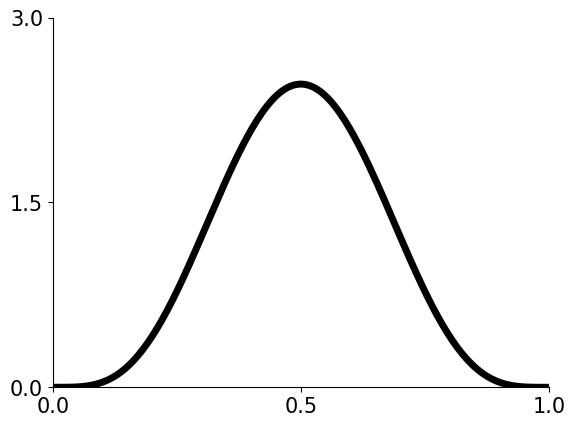

In [40]:
# plot a beta distribution with a = b = 0.01

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

a = 5
b = 5

x = np.linspace(0, 1, 200)
y = stats.beta.pdf(x, a, b)

fig, ax = plt.subplots()

ax.plot(x, y, linewidth=5, color ="#000")
ax.set_xlim(0, 1)
ax.set_ylim(0, 2)

# remove top/right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# increase fontsize of ticks
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 1.5, 3])
ax.tick_params(axis='both', which='major', labelsize=15)


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from typing import List, Optional, Tuple

def plot_contact_matrices(h_values: List[float], 
                         n_groups: int = 5,
                         figsize: Tuple[int, int] = (15, 3),
                         cmap: str = "Blues",
                         save_path: Optional[str] = None):
    """
    Plot contact matrices for different values of homophilic tendency (h).
    
    Args:
        h_values: List of homophilic tendency values to visualize
        n_groups: Number of population groups (matrix size will be n_groups x n_groups)
        figsize: Figure size (width, height)
        cmap: Colormap to use
        save_path: Path to save the figure (if None, figure is not saved)
        
    Returns:
        Matplotlib figure object
    """
    # Import the matrix creation function
    from src.utils.Contact_Matrix import create_contact_matrix
    
    # Create a figure with subplots for each h value
    n_plots = len(h_values)
    fig, axes = plt.subplots(1, n_plots, figsize=figsize)
    
    # If only one h value, make axes iterable
    if n_plots == 1:
        axes = [axes]
    
    # Create an equal population distribution
    pop = jnp.ones(n_groups)
    
    # For each h value, create and plot the contact matrix
    for i, h in enumerate(axes):
        # Create contact matrix
        h_val = h_values[i]
        C = create_contact_matrix(n_groups, h_val, pop)
        
        # Plot as heatmap
        im = axes[i].imshow(C, cmap=cmap)
        axes[i].set_title(f"h = {h_val}")
        
        # Add colorbar
        fig.colorbar(im, ax=axes[i])
        
        # Set axis labels
        axes[i].set_xlabel("Group j")
        axes[i].set_ylabel("Group i")
        
        # Add grid to show matrix cells clearly
        axes[i].grid(False)
        
        # Show the matrix values
        for di in range(n_groups):
            for dj in range(n_groups):
                axes[i].text(dj, di, f'{C[di, dj]:.2f}', 
                           ha='center', va='center', 
                           color='white' if C[di, dj] > 0.5 else 'black')
    
    plt.tight_layout()
    
    # Save if requested
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    return fig

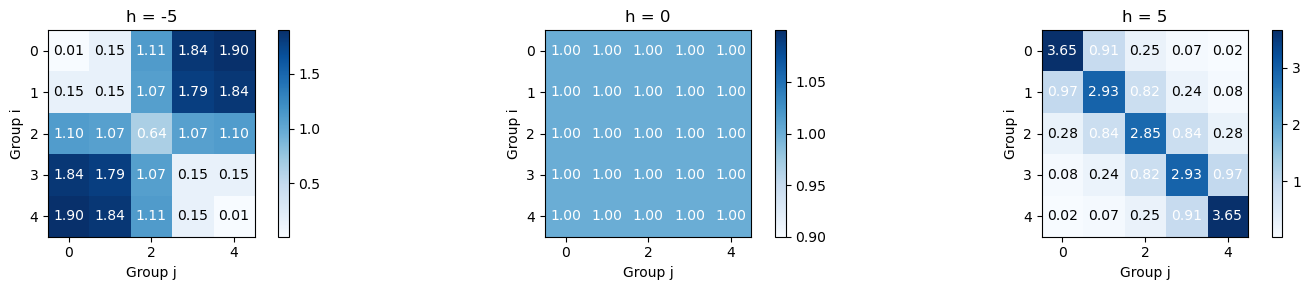

In [52]:
h_values = [-5, 0, 5]  # Different homophilic tendency values
fig = plot_contact_matrices(h_values, n_groups=5)
plt.show()

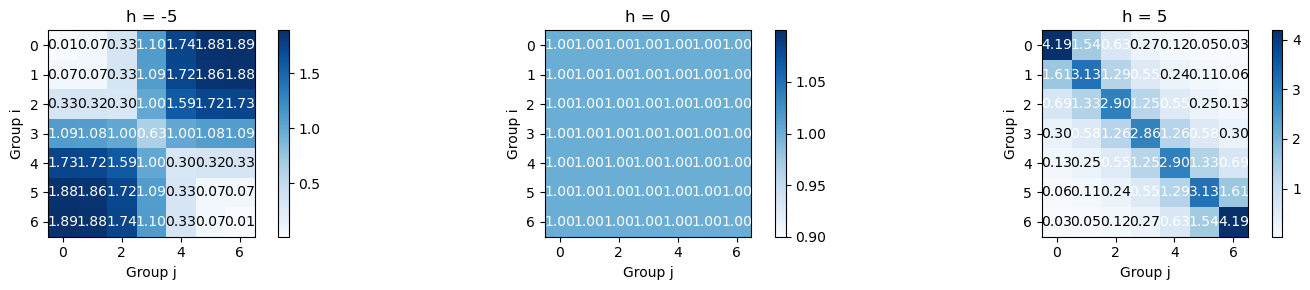

In [53]:
h_values = [-5, 0, 5]  # Different homophilic tendency values
fig = plot_contact_matrices(h_values, n_groups=7)
plt.show()

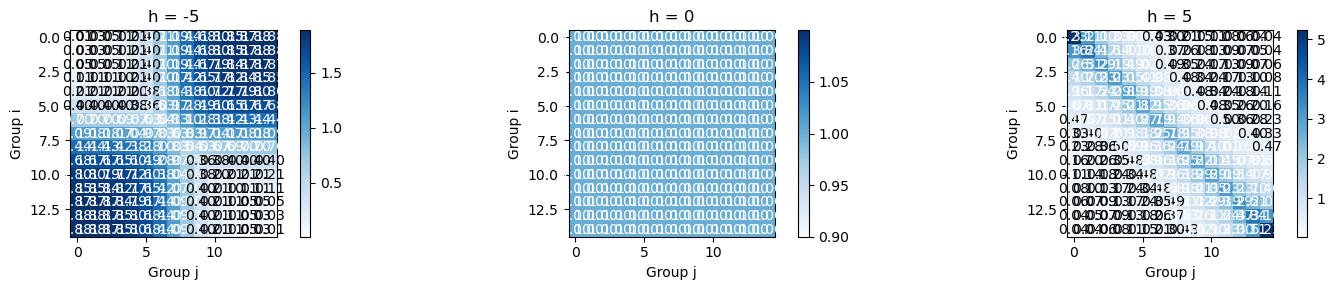

In [54]:
h_values = [-5, 0, 5]  # Different homophilic tendency values
fig = plot_contact_matrices(h_values, n_groups=15)
plt.show()

(-1.0, 5.0)

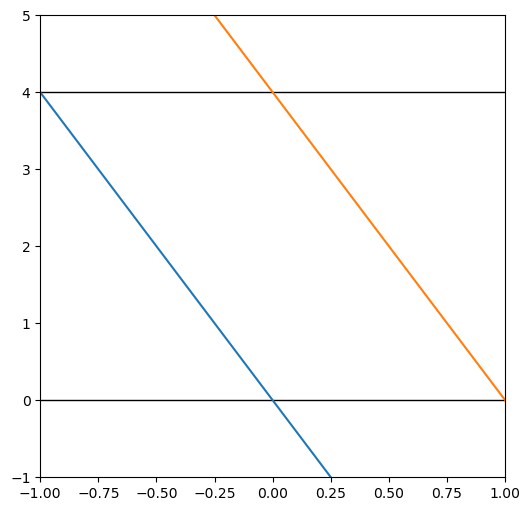

In [126]:
b = np.linspace(-1, 1, 1000)


y1 = -4*b
y2 = -4*b+4

fig, ax = plt.subplots(1, 1, figsize=(6, 6))


ax.plot([b[0], b[-1]], [0, 0], color='black', linewidth=1)
ax.plot([b[0], b[-1]], [4, 4], color='black', linewidth=1)
ax.plot(b,y1)
ax.plot(b,y2)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 5)


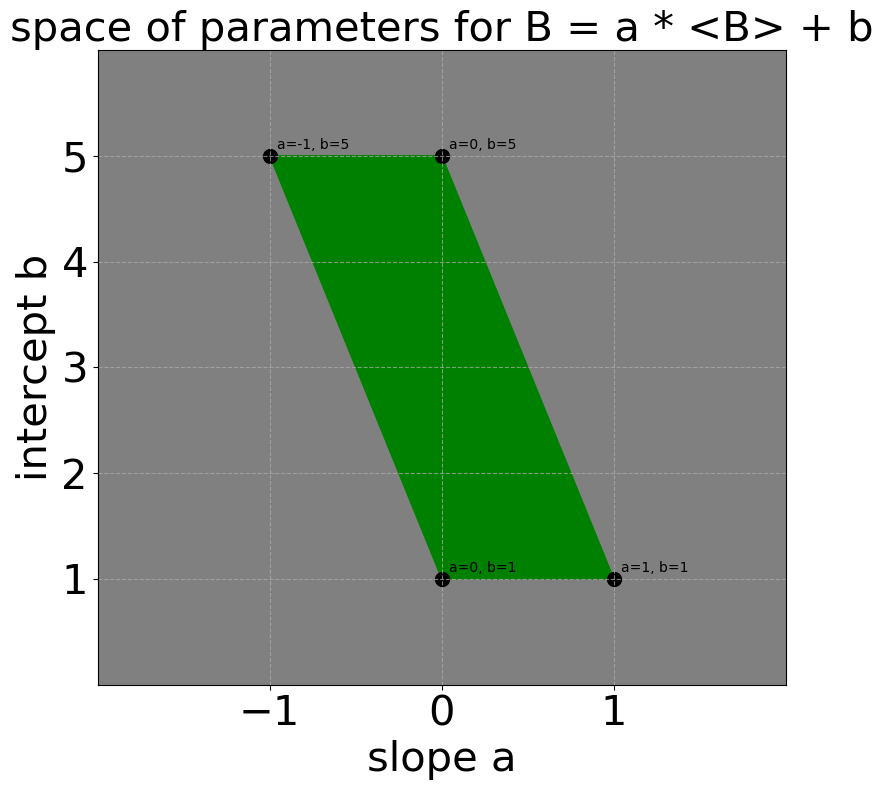

In [144]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Set the background color to yellow
ax.set_facecolor('gray')

# Your points
points = np.array([[0, +1], [1, +1], [0, 4+1], [-1, 4+1]])

# Create a polygon patch
polygon = Polygon(points, closed=True, fill=True, color='green')

# Add the polygon to the plot
ax.add_patch(polygon)

# Set axis limits with some padding
ax.set_xlim(-2, 2)
ax.set_ylim(-1+1, 5+1)

ax.set_xticks([-1, 0, 1])
ax.set_yticks([1,2, 3, 4,5])

# change the fontsize of ticks
ax.tick_params(axis='both', which='major', labelsize=30)
# Add points as scatter plot
ax.scatter(points[:, 0], points[:, 1], color='black', s=100)

# Add labels to points
for i, (x, y) in enumerate(points):
    ax.annotate(f"a={x}, b={y}", (x, y), 
                xytext=(5, 5), textcoords='offset points')

# change the fontsize of labels
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(30)
# Add grid and labels
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_xlabel('slope a', fontsize=30)
ax.set_ylabel('intercept b', fontsize=30)
ax.set_title('space of parameters for B = a * <B> + b', fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()